<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="120" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)
  - **5.2** [**Data Cleaning**](#Section52)
  - **5.2** [**Data Post-profiling**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-profiling**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)
  - **7.2** [**Feature Scaling**](#Section72)
  - **7.3** [**Feature Selection**](#Section73)
  - **7.4** [**Data Preparation**](#Section74)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Baseline Models**](#Section81)
  - **8.2** [**Oversampled Models**](#Section82) 

**9.** [**Conclusion**](#Section9)<br>

---
<a name=Section1 id=Section1></a>
# **1. Introduction**
---

- Physicists define climate as a "**complex system**" or in other words "**unsolvable in analytical ways**". 

- But we actually paves our way to a wide variety of **numerical algorithms** that aim to solve the climate challenges.

- With the computational developments of the last years, Machine Learning algorithms are certainly part of them.

<center><img src = "https://www.aerisweather.com/blog/wp-content/uploads/2020/10/Leaflet_Weather_Map.jpg"></center>

---
<a name=Section2 id=Section2></a>
# **2. Problem Statement**
---

- **Weather forecasting** plays a fundamental role in the early warning of weather **impacts** on various aspects of **human livelihood**. 

- It provides decision making support for autonomous vehicles to **reduce traffic accidents** and congestions.

- It completely depend on the **sensing** and **predicting** of external **environmental factors** such as rainfall, air visibility and so on. 

- Accurate and timely weather prediction has always been the goal of meteorological scientists. 

<center><img src="https://images.indianexpress.com/2021/09/Delhi-Cloudy.jpg"></center>

- The weather and climate research community is increasingly aware of modern ML technologies.

- They are trying to adopt them to solve specific data analysis, numerical modelling in the context of Natural Weather Prediction. 

---
<a name=Section3 id=Section3></a>
# **3. Installing & Importing Libraries**
---

<a name=Section31 id=Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data
!pip install -q --upgrade yellowbrick                               # Toolbox for Measuring Machine Performance

<a name=Section32 id=Section32></a>
### **3.2 Importing Libraries**

In [66]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
from matplotlib import pyplot as plt                                # To use matplotlib's pyplot interface
import seaborn as sns                                               # For attractive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.base import BaseEstimator                              # To create custom transformers
from sklearn.base import ClassifierMixin                            # To create custom transformers
from sklearn.base import TransformerMixin                           # To create custom transformers
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import KFold                           # To perform K-fold executions
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # To estimate accuracy of the model
from sklearn.metrics import precision_score                         # To estimate preicsion of the class
from sklearn.metrics import recall_score                            # To estimate recall of the class
from sklearn.metrics import f1_score                                # To estimate f1-score of the class
from imblearn.over_sampling import SMOTE                            # To perform oversampling over the data
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                 # To create a logistic model
from sklearn.linear_model import SGDClassifier                      # To create a SGD-based model
from sklearn.ensemble import RandomForestClassifier                 # To generate random forest model
from xgboost import XGBClassifier                                   # To generate xgb classifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name=Section4 id=Section4></a>
# **4. Data Acquisition & Wrangling**
---

- This dataset contains about 10 years of daily weather observations from many locations across Australia.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 145460 | 23 | 13.4 MB |

| ID | Feature       | Description                                                             | # | ID | Feature      | Description                                                                                        |
| -- | ------------- | ----------------------------------------------------------------------- | - | -- | ------------ | -------------------------------------------------------------------------------------------------- |
| 1  | Date          | The date of observation                                                 | # | 13 | WindSpeed3pm | Wind speed (km/hr) averaged over 10 minutes prior to 3pm                                           |
| 2  | Location      | The common name of the location of the weather station                  | # | 14 | Humidity9am  | Humidity (percent) at 9am                                                                          |
| 3  | MinTemp       | The minimum temperature in degrees celsius                              | # | 15 | Humidity3pm  | Humidity (percent) at 3pm                                                                          |
| 4  | MaxTemp       | The maximum temperature in degrees celsius                              | # | 16 | Pressure9am  | Atmospheric pressure (hpa) reduced to mean sea level at 9am                                        |
| 5  | Rainfall      | The amount of rainfall recorded for the day in mm                       | # | 17 | Pressure3pm  | Atmospheric pressure (hpa) reduced to mean sea level at 3pm                                        |
| 6  | Evaporation   | The so-called Class A pan evaporation (mm) in the 24 hours to 9am       | # | 18 | Cloud9am     | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. |
| 7  | Sunshine      | The number of hours of bright sunshine in the day.                      | # | 19 | Cloud3pm     | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm.                                    |
| 8  | WindGustDir   | The direction of the strongest wind gust in the 24 hours to midnight    | # | 20 | Temp9am      | Temperature (degrees C) at 9am                                                                     |
| 9  | WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight | # | 21 | Temp3pm      | Temperature (degrees C) at 3pm                                                                     |
| 10 | WindDir9am    | Direction of the wind at 9am                                            | # | 22 | RainToday    | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                   |
| 11 | WindDir3pm    | Direction of the wind at 3pm                                            | # | 23 | RainTomorrow | A kind of measure of the "risk".1 means rain will happen, otherwise 0 (no)                         |
| 12 | WindSpeed9am  | Wind speed (km/hr) averaged over 10 minutes prior to 9am                | # |    |              |                                                                                                    |

In [105]:
filepath = '/content/drive/MyDrive/Notebook Builds/Next Day Whether Prediction in Australia/weatherAUS.csv'
data = pd.read_csv(filepath_or_buffer=filepath)
print('Data Shape:', data.shape)
data.head()

Data Shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<a name=Section41 id=Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<a name=Section42 id=Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Observation:**

- We can observe that there are **null values** in the dataset but we have to **check for duplicates**.

- We can also observe that some of the feature are having **incorrect datatypes**.


<a name=Section5 id=Section5></a>

---
# **5. Data Pre-Processing**
---

<a name=Section51 id=Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates a **profile report** from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- The report shows that there are **overall 23 features**, out of which **16 are numeral**, **15 are categorical**, and **2 are boolean** types.

- There exist **343248 missing values (10.3%)** but **no duplicate values** are present.

| Feature       | Missing Count | Missing Percentage | Data Type   | # | Feature      | Missing Count | Missing Percentage | Data Type |
| ------------- | ------------- | ------------------ | ----------- | - | ------------ | ------------- | ------------------ | --------- |
| MinTemp       | 1485          | 1%                 | Numerical   | # | Humidity9am  | 2654          | 1.80%              | Numerical |
| MaxTemp       | 1261          | 0.90%              | Numerical   | # | Humidity3pm  | 4507          | 3.10%              | Numerical |
| Rainfall      | 3261          | 2.20%              | Numerical   | # | Pressure9am  | 15065         | 10.4%              | Numerical |
| Evaporation   | 62790         | 43.2%              | Numerical   | # | Pressure3pm  | 15028         | 10.3%              | Numerical |
| Sunshine      | 69835         | 48.0%              | Numerical   | # | Cloud9am     | 55888         | 38.4%              | Numerical |
| WindGustDir   | 10326         | 7.10%              | Categorical | # | Cloud3pm     | 59358         | 40.80%             | Numerical |
| WindGustSpeed | 10263         | 7.10%              | Numerical   | # | Temp9am      | 1767          | 1.20%              | Numerical |
| WindDir9am    | 10566         | 7.30%              | Categorical | # | Temp3pm      | 3609          | 2.5%               | Numerical |
| WindDir3pm    | 4228          | 2.9%               | Categorical | # | RainToday    | 3261          | 2.20%              | Boolean   |
| WindSpeed9am  | 1767          | 1.20%              | Numerical   | # | RainTomorrow | 3267          | 2.20%              | Boolean   |
| WindSpeed3pm  | 3062          | 2.10%              | Numerical   | # |              |               |                    |           |

- Following set of features have zero values:

    - Rainfall 91080 (62.6%), Sunshine 2359 (1.6%), WindSpeed9am 8745 (6.0%), Cloud9am 8642 (5.9%), Cloud3pm 4974 (3.4%).

- Date has a high cardinality: 3436 distinct values. Need to transform to datetime.

- Following set of features are having high correlation among each other:

| Feature 1     | Feature 2      | Correlation Type | # | Feature 1    | Feature 2    | Correlation Type |
| ------------- | -------------- | ---------------- | - | ------------ | ------------ | ---------------- |
| MinTemp       |  MaxTemp       | High             | # | Location     |  MinTemp     | High             |
| Evaporation   |  MinTemp       | High             | # | MinTemp      |  Location    | High             |
| Sunshine      |  Humidity9am   | High             | # | MaxTemp      |  Location    | High             |
| WindGustSpeed |  WindSpeed9am  | High             | # | WindGustDir  |  Location    | High             |
| WindSpeed3pm  |  WindGustSpeed | High             | # | WindDir9am   |  Location    | High             |
| Humidity9am   |  Evaporation   | High             | # | WindDir3pm   |  Location    | High             |
| Humidity3pm   |  Sunshine      | High             | # | Humidity9am  |  Location    | High             |
| Pressure9am   |  Pressure3pm   | High             | # | Humidity3pm  |  Location    | High             |
| Cloud9am      |  Sunshine      | High             | # | Pressure9am  |  MinTemp     | High             |
| Cloud3pm      |  Sunshine      | High             | # | Pressure3pm  |  MinTemp     | High             |
| Temp9am       |  MinTemp       | High             | # | Temp9am      |  Location    | High             |
| Temp3pm       |  MinTemp       | High             | # | Temp3pm      |  Location    | High             |
| Evaporation   |  MaxTemp       | High             | # | RainToday    |  Humidity3pm | High             |
| Humidity9am   |  MaxTemp       | High             | # | RainTomorrow |  Sunshine    | High             |
| Humidity3pm   |  MaxTemp       | High             | # |              |              |                  |


<a name=Section52 id=Section52></a>
### **5.2 Data Cleaning**

- In this section, we will perform the **cleaning** **operations** over the features using information from previous section.

In [53]:
# Dropping data rows containing missing data less than 15%
print('Old Data Shape:', data.shape)
data = data.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 
                           'WindGustDir', 'WindGustSpeed', 
                           'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
                           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
                           'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 
                           'RainToday', 'RainTomorrow'])
print('New Data Shape:', data.shape)
print('Drop Ratio (%):', np.round(a=((145460 - 112925) / 145460), decimals=2))

Old Data Shape: (145460, 23)
New Data Shape: (112925, 23)
Drop Ratio (%): 0.22


In [4]:
# Missing data %age after dropping row-wise data
np.round(data[['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']].isnull().sum() / data.shape[0] * 100, decimals=2)

Evaporation    36.43
Sunshine       40.98
Cloud9am       33.04
Cloud3pm       34.22
dtype: float64

**Observations:**

- We can observe that majority of data is missing from the above features.

- We can either go ahead and drop these features completely or replace the values with something more meaniningful like -1.

- The -1 value will signify that the data is missing but we will go ahead and drop these features except Sunshine.

- The Sunshine feature is highly correlated with the RainTomorrow feature and we will replace the missing value with the -1.

In [54]:
# Dropping Evaporation, Cloud9am, Cloud3pm and replacing Sunshine Nans with -1
data.drop(labels=['Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
data['Sunshine'] = data['Sunshine'].replace(np.nan, -1)

# Transforming Date to datetime type
data['Date'] = pd.to_datetime(data['Date'])

print('Data Shape:', data.shape)
data.head()

Data Shape: (112925, 20)


,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,-1.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,-1.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,-1.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,-1.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,-1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


<a name=Section53 id=Section53></a>
### **5.3 Data Post-Profiling**

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation:**

- We can observe that there are **no major changes** in the dataset.

- We have rectified all the issues in the dataset.

<a name=Section6 id=Section6></a>

---
# **6. Exploratory Data Analysis**
---

- In this section, we will **analyze** the dataset to **summarize** their main **characteristics**, often using visuals.

- The **primary goal** is to **retrieve** a **maximum amount of information** from the dataset.

**Note:**

- In the real-time project, we never make use of code-based visualization because they are time-consuming.

- Instead, we make use of Business Intelligence tools such as Power BI or Tableau because they are quick to use.

**<h4>Question:** What type of trend we can observe for the minimum and maximum temperature in Australia?</h4>

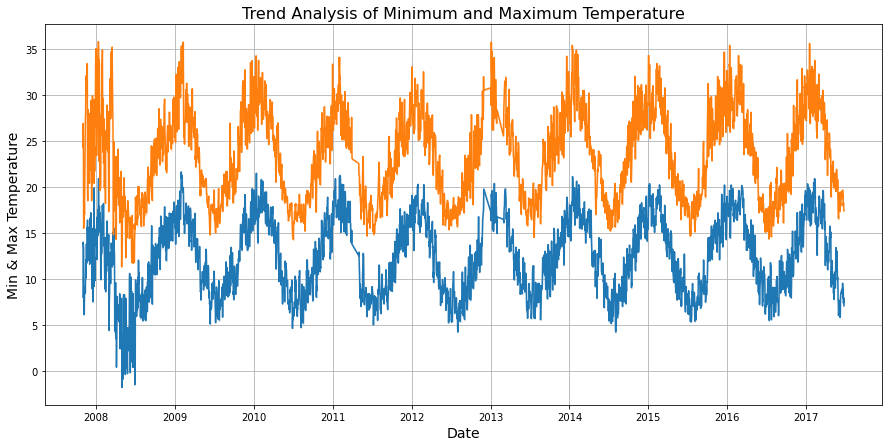

In [23]:
plt.figure(figsize=[15, 7])
sns.lineplot(x=data['Date'], y=data['MinTemp'], ci=False)
sns.lineplot(x=data['Date'], y=data['MaxTemp'], ci=False)
plt.xlabel(xlabel='Date', size=14)
plt.ylabel(ylabel='Min & Max Temperature', size=14)
plt.title(label='Trend Analysis of Minimum and Maximum Temperature', size=16)
plt.grid(b=True)
plt.show()

**<h4>Question:** What is the average minimum temperature and maximum temperature location-wise in Australia?</h4>

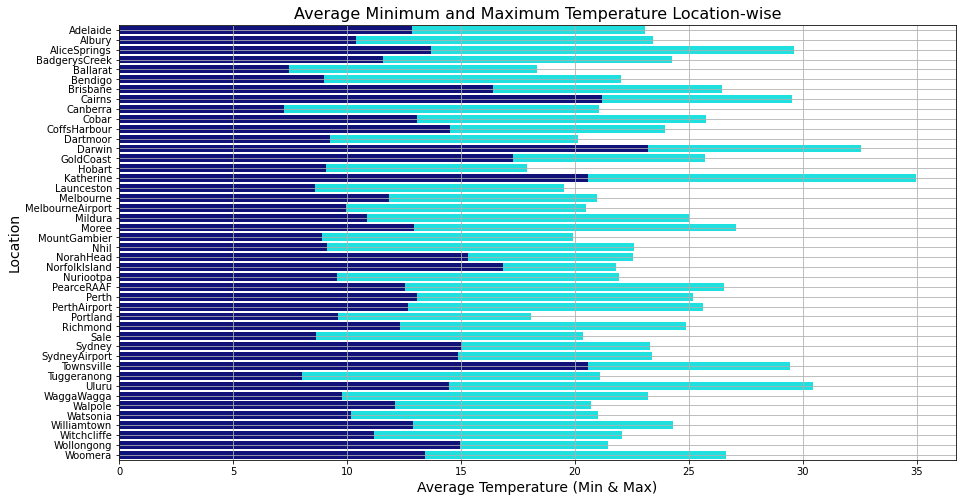

In [21]:
min_avg_temp = data.groupby(by='Location').agg('mean')['MinTemp']
max_avg_temp = data.groupby(by='Location').agg('mean')['MaxTemp']

plt.figure(figsize=[15, 8])
sns.barplot(y=max_avg_temp.index, x=max_avg_temp.values, ci=None, orient='h', color='cyan')
sns.barplot(y=min_avg_temp.index, x=min_avg_temp.values, ci=None, orient='h', color='darkblue')
plt.xlabel(xlabel='Average Temperature (Min & Max)', size=14)
plt.ylabel(ylabel='Location', size=14)
plt.title(label='Average Minimum and Maximum Temperature Location-wise', size=16)
plt.grid(b=True)
plt.show()

**<h4>Question:** What type of trend we can observe for the sunshine concerning date in Australia?</h4>

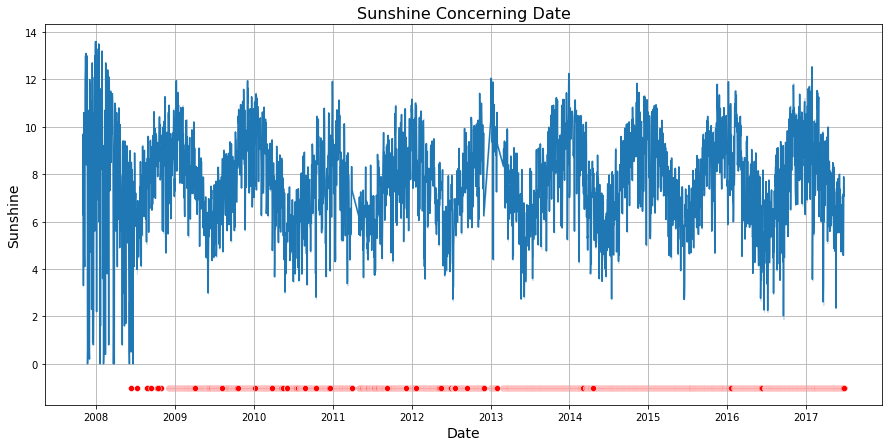

In [28]:
only_sunshine = data[data['Sunshine'] != -1]
nan_sunshine = data[data['Sunshine'] == -1]

plt.figure(figsize=[15, 7])
sns.lineplot(x=only_sunshine['Date'], y=only_sunshine['Sunshine'], ci=False)
sns.scatterplot(x=nan_sunshine['Date'], y=nan_sunshine['Sunshine'], color='red')
plt.xlabel(xlabel='Date', size=14)
plt.ylabel(ylabel='Sunshine', size=14)
plt.title(label='Sunshine Concerning Date', size=16)
plt.grid(b=True)
plt.show()

**Note:** 

- These were a few question that anyone can come up with and get insights out of it.

- We recommend exploring data a little more to get some more valuable insights.

<a name=Section7 id=Section7></a>

---
# **7. Data Post-Processing**
---


<a name=Section71 id=Section71></a>
### **7.1 Feature Encoding**

- Let's transform our categorical feature to numeric by performing dummy encoding over them.

In [35]:
class KFoldTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, colnames , targetName, n_fold=5, verbosity=True, 
                 discardOriginal_col=False, shuffle=False, random_state=None):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits=self.n_fold, shuffle=self.shuffle, random_state=self.random_state)
        col_mean_name = self.colnames + '_' + 'Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.' \
                  .format(col_mean_name, 
                          self.targetName, 
                          np.corrcoef(X[self.targetName].values, 
                                      encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.colnames, axis=1)
        return X

In [55]:
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 0 if x=='No' else 1)

data = pd.get_dummies(data=data, columns=['RainToday'])

# Performing KFold target encoding over years in current job & purpose
for col in list(cat_features):
    kfold_te = KFoldTargetEncoder(colnames=col, targetName='RainTomorrow', discardOriginal_col=True)
    data = kfold_te.fit_transform(X=data)


print('Encoding Suceess!!!')
data.head()

Correlation between the new feature, Location_Enc and, RainTomorrow is 0.039985239995286324.
Correlation between the new feature, WindGustDir_Enc and, RainTomorrow is 0.06299452675336253.
Correlation between the new feature, WindDir9am_Enc and, RainTomorrow is 0.1007404461675452.
Correlation between the new feature, WindDir3pm_Enc and, RainTomorrow is 0.05513803057934237.
Encoding Suceess!!!


,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes,Location_Enc,WindGustDir_Enc,WindDir9am_Enc,WindDir3pm_Enc
0,2008-12-01,13.4,22.9,0.6,-1.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,1,0,0.221554,0.298658,0.284302,0.308516
1,2008-12-02,7.4,25.1,0.0,-1.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,1,0,0.221554,0.310566,0.314382,0.228725
2,2008-12-03,12.9,25.7,0.0,-1.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,1,0,0.221554,0.253837,0.284302,0.228725
3,2008-12-04,9.2,28.0,0.0,-1.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1,0,0.221554,0.180506,0.143386,0.157992
4,2008-12-05,17.5,32.3,1.0,-1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,1,0,0.221554,0.298658,0.160483,0.299659


<a name=Section72 id=Section72></a>
### **7.2 Feature Scaling**

- Let's scale our feature to a standard scale using standard scaling.

In [57]:
X = data.drop(labels=['Date', 'RainTomorrow'], axis=1)
y = data['RainTomorrow']

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_frame = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled_frame.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_No,RainToday_Yes,Location_Enc,WindGustDir_Enc,WindDir9am_Enc,WindDir3pm_Enc
0,0.117567,-0.108221,-0.206661,-0.99423,0.241214,0.577742,0.524408,0.190140,-1.380413,-1.382962,-1.142455,-0.088435,-0.047870,0.538281,-0.538281,-0.097439,1.531309,1.048247,1.874233
1,-0.841802,0.206845,-0.276405,-0.99423,0.241214,-1.339742,0.291310,-1.237561,-1.235963,-0.970598,-1.041848,-0.041228,0.317768,0.538281,-0.538281,-0.097439,1.772833,1.568771,0.139728
2,0.037620,0.292772,-0.276405,-0.99423,0.391345,0.457900,0.757507,-1.554828,-0.995214,-1.397181,-0.912497,0.556724,0.156887,0.538281,-0.538281,-0.097439,0.622183,1.048247,0.139728
3,-0.553991,0.622159,-0.276405,-0.99423,-1.260094,-0.500842,-1.223831,-1.184683,-1.669313,0.024764,-0.323229,0.100392,0.639531,0.538281,-0.538281,-0.097439,-0.865226,-1.390201,-1.397874
4,0.773137,1.237969,-0.160165,-0.99423,0.016018,-0.980214,0.058211,0.771796,-0.850764,-0.942159,-1.300551,0.053185,1.107548,0.538281,-0.538281,-0.097439,1.531309,-1.094357,1.681695


<a name=Section73 id=Section73></a>
### **7.3 Feature Selection**

- Now in the real world, it is very rare that all the **features** are **important** while developing the **model**.

- Instead, we analyze the **impact** of **input** feature values over the **target** feature values.

- It is either done by performing **statistical tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- Random forests are one of the most **popular** machine learning **algorithms**.

- They provide good predictive performance, low overfitting, and easy interpretability.

- This **interpretability** is derived from the importance of each feature on the tree decision evaluated the **reduction in impurity**.

- In other words, it is **easy** to **compute** how much each feature is **contributing** to the decision.

- We will implement **SelectFromModel()** available in Sklearn which uses the base estimator to identify important features.

- The importance of a feature is determined based on a **threshold** (a measure to calculate feature importance).


In [59]:
# Have some patience, it may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
selector.fit(X_scaled_frame, y)

# Extracting list of important features
selected_feat = X_scaled_frame.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 7
Threshold set by Model: 0.05
Important Features: ['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']


**Visualzation of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

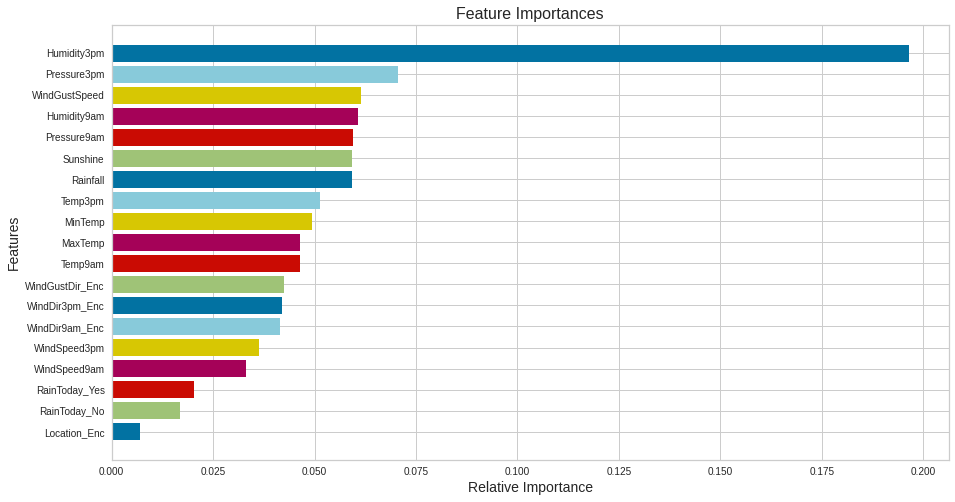

In [60]:
# Have some patience, may take some time :)
figure = plt.figure(figsize=[15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(X_scaled_frame, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

<a name=Section74 id=Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_frame, y, test_size=0.1, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (101632, 19) (101632,)
Testing Data Shape: (11293, 19) (11293,)


<a name=Section8 id=Section8></a>

---
# **8. Model Development & Evaluation**
---


<a name=Section81 id=Section81></a>

### **8.1 Baseline Models**

In [94]:
metrics = list()
clf_name = list()

classifiers = [LogisticRegression(random_state=42, class_weight='balanced'), 
               RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               SGDClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               XGBClassifier(random_state=42, n_jobs=-1)]

for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)

    y_train_predict = classifier.predict(X_train)
    y_test_predict = classifier.predict(X_test)

    accuracy_train = str(np.round(a=accuracy_score(y_true=y_train, y_pred=y_train_predict) * 100, decimals=2)) + '%'
    accuracy_test = str(np.round(a=accuracy_score(y_true=y_test, y_pred=y_test_predict) * 100, decimals=2)) + '%'

    precision_train_0 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_test_0 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_train_1 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    precision_test_1 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    recall_train_0 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_test_0 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_train_1 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    recall_test_1 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    f1_train_0 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_test_0 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_train_1 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    f1_test_1 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    metrics.append([accuracy_train, accuracy_test, precision_train_0, precision_test_0, 
                    precision_train_1, precision_test_1, recall_train_0, recall_test_0, 
                    recall_train_1, recall_test_1, f1_train_0, f1_test_0, f1_train_1, f1_test_1])
    clf_name.append(classifier.__class__.__name__)

columns = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision [0] (Train)', 'Precision [0] (Test)', 
           'Precision [1] (Train)', 'Precision [1] (Test)', 'Recall [0] (Train)', 'Recall [0] (Test)', 
           'Recall [1] (Train)', 'Recall [1] (Test)',  'F1-Score [0] (Train)', 'F1-Score [0] (Test)', 
           'F1-Score [1] (Train)', 'F1-Score [1] (Test)']
result_frame = pd.DataFrame(data=metrics, index=clf_name, columns=columns)
result_frame.T

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier
Accuracy (Train),79.63%,100.0%,79.74%,85.57%
Accuracy (Test),79.9%,85.92%,80.27%,85.59%
Precision [0] (Train),92.48%,100.0%,92.14%,87.28%
Precision [0] (Test),92.72%,87.1%,92.49%,87.17%
Precision [1] (Train),52.76%,100.0%,52.98%,75.87%
Precision [1] (Test),53.17%,78.72%,53.84%,76.44%
Recall [0] (Train),80.37%,100.0%,80.87%,95.37%
Recall [0] (Test),80.5%,96.16%,81.25%,95.56%
Recall [1] (Train),77.04%,100.0%,75.76%,51.16%
Recall [1] (Test),77.78%,49.96%,76.82%,50.56%


<a name=Section82 id=Section82></a>

### **8.1 Oversampled Models**

In [98]:
print('Training Data Shape (Before Oversampling):', X_train.shape, y_train.shape)
print('Testing Data Shape (Before Oversampling):', X_test.shape, y_test.shape)
sm = SMOTE(random_state=42)
X1, y1 = sm.fit_resample(X_scaled_frame, y)
X_new = pd.DataFrame(data=X1, columns=X_scaled_frame.columns)
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.1, random_state=42, stratify=y1)
print('Training Data Shape (After Oversampling):', X_train.shape, y_train.shape)
print('Testing Data Shape (After Oversampling):', X_test.shape, y_test.shape)

Training Data Shape (Before Oversampling): (101632, 19) (101632,)
Testing Data Shape (Before Oversampling): (11293, 19) (11293,)
Training Data Shape (After Oversampling): (158230, 19) (158230,)
Testing Data Shape (After Oversampling): (17582, 19) (17582,)


In [100]:
metrics = list()
clf_name = list()

classifiers = [LogisticRegression(random_state=42, class_weight='balanced'), 
               RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               SGDClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               XGBClassifier(random_state=42, n_jobs=-1)]

for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)

    y_train_predict = classifier.predict(X_train)
    y_test_predict = classifier.predict(X_test)

    accuracy_train = str(np.round(a=accuracy_score(y_true=y_train, y_pred=y_train_predict) * 100, decimals=2)) + '%'
    accuracy_test = str(np.round(a=accuracy_score(y_true=y_test, y_pred=y_test_predict) * 100, decimals=2)) + '%'

    precision_train_0 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_test_0 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_train_1 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    precision_test_1 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    recall_train_0 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_test_0 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_train_1 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    recall_test_1 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    f1_train_0 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_test_0 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_train_1 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    f1_test_1 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    metrics.append([accuracy_train, accuracy_test, precision_train_0, precision_test_0, 
                    precision_train_1, precision_test_1, recall_train_0, recall_test_0, 
                    recall_train_1, recall_test_1, f1_train_0, f1_test_0, f1_train_1, f1_test_1])
    clf_name.append(classifier.__class__.__name__)

columns = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision [0] (Train)', 'Precision [0] (Test)', 
           'Precision [1] (Train)', 'Precision [1] (Test)', 'Recall [0] (Train)', 'Recall [0] (Test)', 
           'Recall [1] (Train)', 'Recall [1] (Test)',  'F1-Score [0] (Train)', 'F1-Score [0] (Test)', 
           'F1-Score [1] (Train)', 'F1-Score [1] (Test)']
result_frame = pd.DataFrame(data=metrics, index=clf_name, columns=columns)
result_frame.T

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier
Accuracy (Train),79.08%,100.0%,79.01%,85.94%
Accuracy (Test),78.92%,90.95%,79.12%,85.92%
Precision [0] (Train),78.35%,100.0%,78.74%,85.69%
Precision [0] (Test),78.01%,91.6%,78.69%,85.42%
Precision [1] (Train),79.85%,100.0%,79.27%,86.2%
Precision [1] (Test),79.89%,90.32%,79.57%,86.44%
Recall [0] (Train),80.37%,100.0%,79.46%,86.29%
Recall [0] (Test),80.55%,90.17%,79.88%,86.63%
Recall [1] (Train),77.79%,100.0%,78.55%,85.59%
Recall [1] (Test),77.29%,91.73%,78.36%,85.21%


**Observations:**

- We can observe that all the models are performing better over the baseline models.

- We can either go ahead with Random Forest or Extreme Gradient Boosing classifier.

<a name=Section9 id=Section9></a>

---
# **9. Conclusion**
---

- We **analyzed** and understood the **behavior** of the data and performed manipulations accordingly.

- We **performed several transformations** over the weather data as per the requirement.

- We performed **several transformations** over the data such as **encoding, scaling, and feature selection**.

- We developed four different types of models such as Logistic Regression, Random Forest, SGD, and extreme gradient descent.

- We trained model over baseline and oversampled data and found that we get better results with oversampled data.

- Finally, we choose **Random Forest** and **Extreme Gradient Descent** as a **potential candidates** for the production.